# Sorting Products
- According to some factors, we need to sort some products or people or whatever object of focus.

# Business Problem
- The film lists are requested to be updated by sorting the movies according to their current scores and ratings listed on the IMDb page.

# Data Story
- The dataset consists of various features related to movies found on the IMDb page, such as "title", "vote_average" and "vote_count".
- We will use the variables "title", "vote_average" and "vote_count" in this dataset.

- **title:** Name of the movie
- **vote_average:** Average score of the movie (between 1 - 10)
- **vote_count:** Number of people scoring

In [1]:
# import Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import math
import scipy.stats as st

import matplotlib.pyplot as plt
import plotly.express as px
import warnings

from sklearn.preprocessing import MinMaxScaler

warnings.simplefilter(action="ignore")

In [2]:
# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
# Loading the Data Set

df = pd.read_csv("/kaggle/input/movie-metadata/movies_metadata.csv")

In [4]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.94694,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00000,81.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70000,5415.00000
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.01554,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00000,104.00000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90000,2413.00000
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.71290,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00000,101.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50000,92.00000
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00000,127.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10000,34.00000
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00000,106.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70000,173.00000


In [5]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(45466, 24)
##################### Types #####################
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object
##################### Head #####################
   adult                         

In [6]:
# We selected the variables we will use from the df data set and reassigned them to df.

df = df[["title", "vote_average", "vote_count"]]

In [7]:
df.head()

,title,vote_average,vote_count
0,Toy Story,7.70000,5415.00000
1,Jumanji,6.90000,2413.00000
2,Grumpier Old Men,6.50000,92.00000
3,Waiting to Exhale,6.10000,34.00000
4,Father of the Bride Part II,5.70000,173.00000


In [8]:
df.shape

(45466, 3)

# Ranking by Vote Average

In [9]:
df.sort_values("vote_average", ascending=False).head(20)

,title,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,10.00000,1.00000
15710,If God Is Willing and da Creek Don't Rise,10.00000,1.00000
22396,Meat the Truth,10.00000,1.00000
22395,Marvin Hamlisch: What He Did For Love,10.00000,1.00000
35343,Elaine Stritch: At Liberty,10.00000,1.00000
186,Reckless,10.00000,1.00000
45047,The Human Surge,10.00000,1.00000
22377,The Guide,10.00000,1.00000
22346,هیچ کجا هیچ کس,10.00000,1.00000
1634,Other Voices Other Rooms,10.00000,1.00000


In [10]:
df["vote_count"].describe([0.10, 0.25, 0.50, 0.70, 0.80, 0.90, 0.95, 0.99]).T

count   45460.00000
mean      109.89734
std       491.31037
min         0.00000
10%         1.00000
25%         3.00000
50%        10.00000
70%        25.00000
80%        50.00000
90%       160.00000
95%       434.00000
99%      2183.82000
max     14075.00000
Name: vote_count, dtype: float64

**Note:** In order to use vote_count and vote_average variables together, we **standardized** the vote_count variable to be in the same range as the vote_average variable. Thus, it came between the same range (1-10). From now on, we can use both variables as ranking criteria.

In [11]:
# We ranked those with more than 400 votes in descending order.

df[df["vote_count"] > 400].sort_values("vote_average", ascending=False).head(20)

,title,vote_average,vote_count
10309,Dilwale Dulhania Le Jayenge,9.10000,661.00000
40251,Your Name.,8.50000,1030.00000
834,The Godfather,8.50000,6024.00000
314,The Shawshank Redemption,8.50000,8358.00000
1152,One Flew Over the Cuckoo's Nest,8.30000,3001.00000
1176,Psycho,8.30000,2405.00000
1178,The Godfather: Part II,8.30000,3418.00000
292,Pulp Fiction,8.30000,8670.00000
1184,Once Upon a Time in America,8.30000,1104.00000
5481,Spirited Away,8.30000,3968.00000


In [12]:
# We standardized the vote_count variable.

df["vote_count_score"] = MinMaxScaler(feature_range=(1, 10)). \
    fit(df[["vote_count"]]). \
    transform(df[["vote_count"]])

In [13]:
df.head(20)

,title,vote_average,vote_count,vote_count_score
0,Toy Story,7.70000,5415.00000,4.46252
1,Jumanji,6.90000,2413.00000,2.54295
2,Grumpier Old Men,6.50000,92.00000,1.05883
3,Waiting to Exhale,6.10000,34.00000,1.02174
4,Father of the Bride Part II,5.70000,173.00000,1.11062
5,Heat,7.70000,1886.00000,2.20597
6,Sabrina,6.20000,141.00000,1.09016
7,Tom and Huck,5.40000,45.00000,1.02877
8,Sudden Death,5.50000,174.00000,1.11126
9,GoldenEye,6.60000,1194.00000,1.76348


In [14]:
# Creat a new variable

df["average_count_score"] = df["vote_average"] * df["vote_count_score"]

In [15]:
df.head()

,title,vote_average,vote_count,vote_count_score,average_count_score
0,Toy Story,7.70000,5415.00000,4.46252,34.36142
1,Jumanji,6.90000,2413.00000,2.54295,17.54634
2,Grumpier Old Men,6.50000,92.00000,1.05883,6.88238
3,Waiting to Exhale,6.10000,34.00000,1.02174,6.23262
4,Father of the Bride Part II,5.70000,173.00000,1.11062,6.33054


In [16]:
df.sort_values("average_count_score", ascending=False).head(20)

,title,vote_average,vote_count,vote_count_score,average_count_score
15480,Inception,8.10000,14075.00000,10.00000,81.00000
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190
17818,The Avengers,7.40000,12000.00000,8.67318,64.18153
14551,Avatar,7.20000,12114.00000,8.74607,62.97174
26564,Deadpool,7.40000,11444.00000,8.31766,61.55065
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388
20051,Django Unchained,7.80000,10297.00000,7.58423,59.15697
23753,Guardians of the Galaxy,7.90000,10014.00000,7.40327,58.48582
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414


# IMDB Weighted Rating

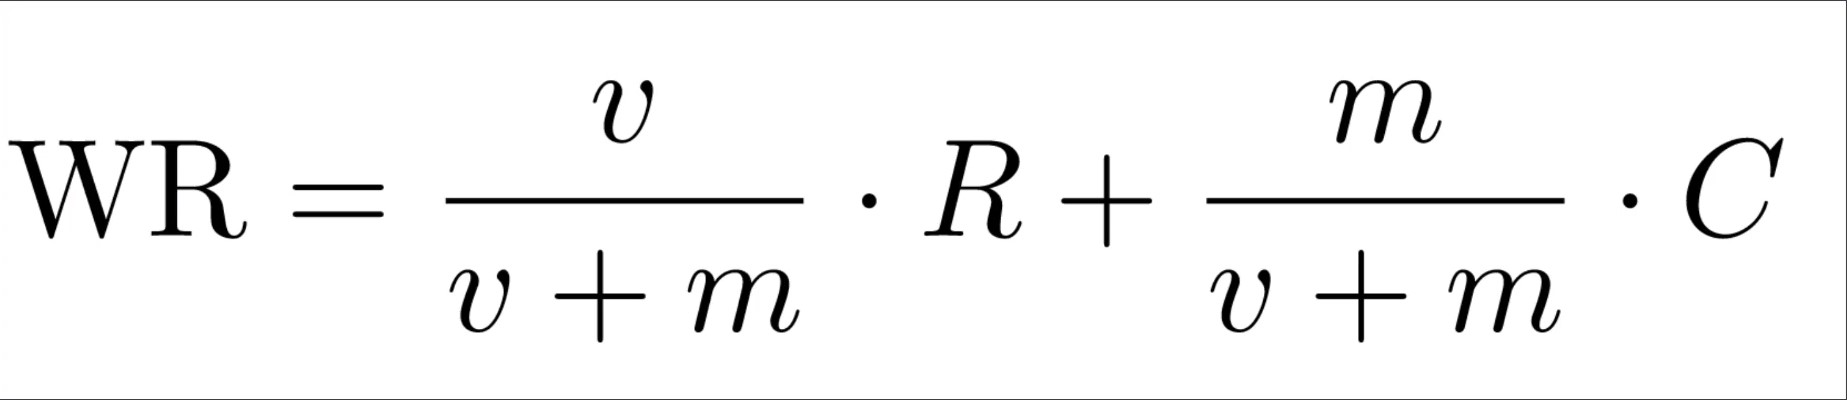

# weighted_rating = (v/(v+M) * r) + (M/(v+M) * C)

- **r:** vote average
- **v:** vote count
- **M:** minimum votes required to be listed in the Top 250
- **C:** the mean vote across the whole report (currently 7.0)

# Movie 1

- r = 8
- M = 500
- v = 1000

In [17]:
(1000 / (1000+500))*8 

5.333333333333333

# Movie 2

- r = 8
- M = 500
- v = 3000

In [18]:
(3000 / (3000+500))*8

6.857142857142857

# Movie 1

- r = 8
- M = 500
- v = 1000

**First Part**

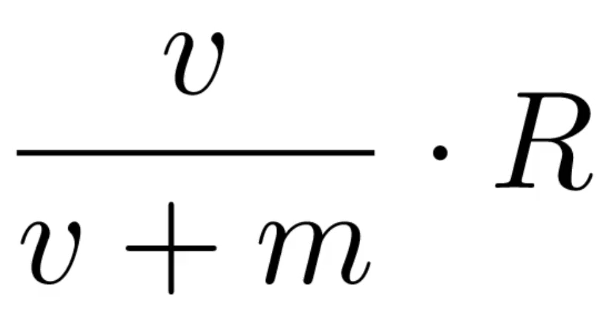

In [19]:
(1000 / (1000+500))*8

5.333333333333333

**Second Part**

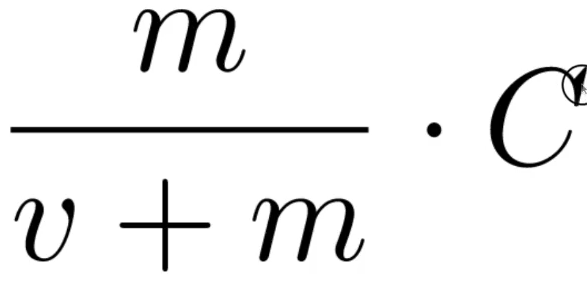

In [20]:
500/(1000+500) * 7

2.333333333333333

In [21]:
Total1 = 5.333333333333333 + 2.333333333333333

In [22]:
Total1

7.666666666666666

# Movie 2

- r = 8
- M = 500
- v = 3000

**First Part**

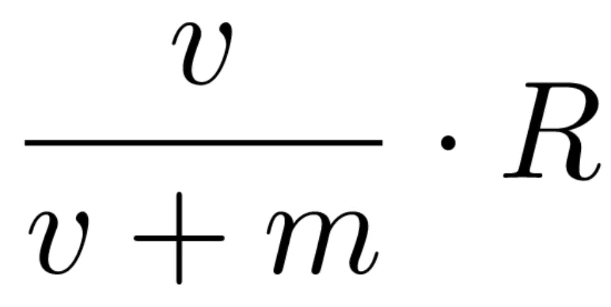

In [23]:
(3000 / (3000+500))*8

6.857142857142857

**Second Part**

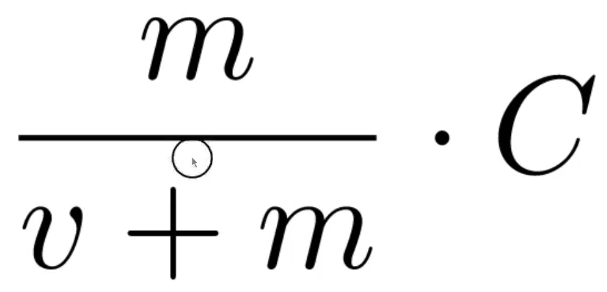

In [24]:
500/(3000+500) * 7

1.0

In [25]:
Total2 = 6.857142857142857 + 1.0

In [26]:
Total2

7.857142857142857

In [27]:
M = 2500
C = df['vote_average'].mean()

In [28]:
def weighted_rating(r, v, M, C):
    return (v / (v + M) * r) + (M / (v + M) * C)

In [29]:
df.sort_values("average_count_score", ascending=False).head(10)

,title,vote_average,vote_count,vote_count_score,average_count_score
15480,Inception,8.10000,14075.00000,10.00000,81.00000
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190
17818,The Avengers,7.40000,12000.00000,8.67318,64.18153
14551,Avatar,7.20000,12114.00000,8.74607,62.97174
26564,Deadpool,7.40000,11444.00000,8.31766,61.55065
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388
20051,Django Unchained,7.80000,10297.00000,7.58423,59.15697
23753,Guardians of the Galaxy,7.90000,10014.00000,7.40327,58.48582
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414


In [30]:
# Our score for Deadpool

weighted_rating(7.40000, 11444.00000, M, C)

7.080544896574546

In [31]:
# Our score for Inception

weighted_rating(8.10000, 14075.00000, M, C)

7.725672279809078

In [32]:
# Our score for The Shawshank Redemption

weighted_rating(8.50000, 8358.00000, M, C)

7.83648167598411

In [33]:
df["weighted_rating"] = weighted_rating(df["vote_average"],
                                        df["vote_count"], M, C)

In [34]:
df.head(20)

,title,vote_average,vote_count,vote_count_score,average_count_score,weighted_rating
0,Toy Story,7.70000,5415.00000,4.46252,34.36142,7.04245
1,Jumanji,6.90000,2413.00000,2.54295,17.54634,6.24775
2,Grumpier Old Men,6.50000,92.00000,1.05883,6.88238,5.64951
3,Waiting to Exhale,6.10000,34.00000,1.02174,6.23262,5.62467
4,Father of the Bride Part II,5.70000,173.00000,1.11062,6.33054,5.62350
5,Heat,7.70000,1886.00000,2.20597,16.98595,6.51339
6,Sabrina,6.20000,141.00000,1.09016,6.75899,5.64927
7,Tom and Huck,5.40000,45.00000,1.02877,5.55538,5.61435
8,Sudden Death,5.50000,174.00000,1.11126,6.11194,5.61052
9,GoldenEye,6.60000,1194.00000,1.76348,11.63898,5.93555


In [35]:
df.sort_values("weighted_rating", ascending=False).head(20)

,title,vote_average,vote_count,vote_count_score,average_count_score,weighted_rating
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505,7.84604
314,The Shawshank Redemption,8.50000,8358.00000,6.34437,53.92714,7.83648
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388,7.74946
15480,Inception,8.10000,14075.00000,10.00000,81.00000,7.72567
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414,7.69978
834,The Godfather,8.50000,6024.00000,4.85194,41.24146,7.65480
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190,7.64669
351,Forrest Gump,8.20000,8147.00000,6.20945,50.91748,7.59377
7000,The Lord of the Rings: The Return of the King,8.10000,8226.00000,6.25996,50.70571,7.52155
4863,The Lord of the Rings: The Fellowship of the Ring,8.00000,8892.00000,6.68583,53.48661,7.47731


# Bayesian Average Rating Score (BAR Score)

In [36]:
def bayesian_average_rating(n, confidence=0.95):
    if sum(n) == 0:
        return 0
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    return score

Note: 34733, 4355, 4704, 6561, 13515, 26183, 87368, 273082, 600260, 1295351 these numbers are the number of votes for the stars.

- 34733 stars is for 1 star
- 4355 stars for 2 star etc.

In [37]:
# for The Shawshank Redemption

bayesian_average_rating([34733, 4355, 4704, 6561, 13515, 26183, 87368, 273082, 600260, 1295351])

9.14538444560111

In [38]:
# for The God Father

bayesian_average_rating([37128, 5879, 6268, 8419, 16603, 30016, 78538, 199430, 402518, 837905])

8.940007324860396

In [39]:
# df = pd.read_csv("datasets/imdb_ratings.csv")

In [40]:
df_1 = pd.read_csv("/kaggle/input/ratings/imdb_ratings.csv")

In [41]:
df_1.head(10)

,Unnamed: 0,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one
0,0,111161,1. The Shawshank Redemption (1994),9.20000,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733
1,1,68646,2. The Godfather (1972),9.10000,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128
2,2,71562,3. The Godfather: Part II (1974),9.00000,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469
3,3,468569,4. The Dark Knight (2008),9.00000,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345
4,4,50083,5. 12 Angry Men (1957),8.90000,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318
5,5,108052,6. Schindler's List (1993),8.90000,453906,383584,220586,82367,27219,12922,6234,4572,4289,19328
6,6,167260,7. The Lord of the Rings: The Return of ...,8.90000,703093,433087,270113,117411,44760,21818,10873,7987,6554,28990
7,7,110912,8. Pulp Fiction (1994),8.80000,674884,541946,332876,140886,52091,26828,14203,10425,8912,25610
8,8,60196,"9. Il buono, il brutto, il cattivo (1966)",8.80000,246549,199725,138309,58595,18777,8607,3903,2451,2032,10319
9,9,120737,10. The Lord of the Rings: The Fellowshi...,8.80000,631020,460809,316221,132929,46699,22658,11002,8295,6911,27013


In [42]:
df_1 = df_1.iloc[0:, 1:]

In [43]:
df_1.head()

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one
0,111161,1. The Shawshank Redemption (1994),9.20000,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733
1,68646,2. The Godfather (1972),9.10000,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128
2,71562,3. The Godfather: Part II (1974),9.00000,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469
3,468569,4. The Dark Knight (2008),9.00000,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345
4,50083,5. 12 Angry Men (1957),8.90000,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318


In [44]:
df_1["bar_score"] = df_1.apply(lambda x: bayesian_average_rating(x[["one", "two", "three", "four", "five",
                                                                "six", "seven", "eight", "nine", "ten"]]), axis=1)

In [45]:
df_1.head()

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one,bar_score
0,111161,1. The Shawshank Redemption (1994),9.20000,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733,9.14539
1,68646,2. The Godfather (1972),9.10000,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128,8.94002
2,71562,3. The Godfather: Part II (1974),9.00000,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469,8.81250
3,468569,4. The Dark Knight (2008),9.00000,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345,8.89596
4,50083,5. 12 Angry Men (1957),8.90000,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318,8.76793


In [46]:
df_1.sort_values("bar_score", ascending=False).head(20)

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one,bar_score
0,111161,1. The Shawshank Redemption (1994),9.20000,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733,9.14539
1,68646,2. The Godfather (1972),9.10000,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128,8.94002
3,468569,4. The Dark Knight (2008),9.00000,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345,8.89596
2,71562,3. The Godfather: Part II (1974),9.00000,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469,8.81250
4,50083,5. 12 Angry Men (1957),8.90000,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318,8.76793
6,167260,7. The Lord of the Rings: The Return of ...,8.90000,703093,433087,270113,117411,44760,21818,10873,7987,6554,28990,8.75204
5,108052,6. Schindler's List (1993),8.90000,453906,383584,220586,82367,27219,12922,6234,4572,4289,19328,8.74361
11,109830,12. Forrest Gump (1994),8.80000,622104,553654,373644,151284,51140,22720,11692,7647,5941,12110,8.69915
12,1375666,13. Inception (2010),8.70000,724798,627987,408686,174229,60668,26910,13436,8703,6932,17621,8.69315
10,137523,11. Fight Club (1999),8.80000,637087,572654,371752,152295,53059,24755,12648,8606,6948,17435,8.67448
